# TITANIC - Machine Learning from Disaster

- Será abordado neste projeto um conjunto de dados muito famoso do Titanic que faz parte de uma competição do Kaggle.

- [Clique aqui para acessar os dados disponíveis no Kaggle](https://www.kaggle.com/competitions/titanic)

- Objetivo do projeto é usar o aprendizado de máquina para **criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic**

- É utilizado a **acurácia** para avaliar o resultado do modelo

**___________________________________________________________________________________________________________________________**

# ETAPAS DO PROJETO
- [Importação](#importacao)
- [Feature Selection](#feat)
- [Modelagem e Avaliação](#modelagem)
- [Previsão](#previsao)
- [Conclusão](#conclusao)
- [Resumo](#resumo)

**___________________________________________________________________________________________________________________________**
<a id='importacao'></a>
# IMPORTAÇÃO

- Vamos importar as bases finais da parte 2

In [2]:
# Importação de algumas bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

# Ignorando os avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualizando a base de treino
treino = pd.read_csv('dataset_parte2/train_parte2.csv')
treino.head(3)

,PassengerId,Survived,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
0,1,0,3,1,0,0,1,0,0,1,0,0,2,1,3
1,2,1,1,0,1,0,0,0,0,0,1,0,2,1,1
2,3,1,3,0,0,0,1,0,1,0,0,0,2,0,3


In [3]:
# Visualizando a base de teste
teste = pd.read_csv('dataset_parte2/test_parte2.csv')
teste.head(3)

,PassengerId,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
0,892,3,1,0,1,0,0,0,1,0,0,2,0,3
1,893,3,0,0,0,1,0,0,0,1,0,2,1,3
2,894,2,1,0,1,0,0,0,1,0,0,3,0,3


- Inicialmente a base será a mesma para todos os modelos

In [4]:
# LogisticRegression
treino_rl = treino

# RandomForest
treino_rf = treino

# MLPClassifier
treino_mlp = treino

# SVC
treino_svc = treino

- Vamos testar essa base de dados utilizando modelos de machine learning mais avançados e armazenar os resultados das avaliações em um dataframe para facilitar a comparação com as melhorias que faremos posteriormente.

<font color='red'> **Vamos dar prosseguimento ao 1º PASSO.** </font> [#1º PASSO](#passo1)

<a id='passo2'></a>
- **Vamos continuar daqui o 2º PASSO...**

**No final da parte 2 do projeto, foram sugeridas algumas análises e tratamentos que podem contribuir para aumentar a acurácia do nosso modelo.**

- Após a submissão do "submission_parte1.csv" no Kaggle, obtivemos um Score: 0.76076
- Após a submissão do "submission_parte2.csv" no Kaggle, obtivemos um Score: 0.77033

**Melhorias**
- Testar algoritmos mais avançados
- Realizar a validação cruzada
- Feature Selection
- Fazer o tunning do modelo com o GridSearchCV

**Vamos explorar estes pontos a seguir**

**___________________________________________________________________________________________________________________________**
<a id='feat'></a>
# FEATURE SELECTION
- Seleciona os recursos de acordo com as k pontuações mais altas.
    - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [21]:
# Importando o SelectKBest
from sklearn.feature_selection import SelectKBest

In [22]:
# Separando os dados de treino e teste
X = treino.drop(['PassengerId', 'Survived'],axis=1)
y = treino['Survived']

In [23]:
# Criando o nosso seletor
seletor = SelectKBest(k=10).fit(X,y)

In [24]:
# Visualizando os scores das colunas
df_selection = pd.DataFrame(index=X.columns, data=seletor.scores_, columns=['Score']).sort_values('Score', ascending=False)
df_selection

,Score
Title_Mr,383.945495
Sex_male,372.405724
Title_Mrs,115.461086
Pclass,115.031272
Title_Miss,106.509051
Classe_Fare,57.695156
Embarked_C,25.895987
Embarked_S,20.374460
Classe_Idade,12.328492
Title_Master,6.503635


In [26]:
# Seleciona os recursos de acordo com as 10 pontuações mais altas
seletor.get_feature_names_out()

array(['Pclass', 'Sex_male', 'Embarked_C', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Classe_Idade',
       'Classe_Fare'], dtype=object)

In [27]:
# Seleciona as colunas que iremos remover com pontuações baixas
remov_cols = [x for x in treino.columns if x not in seletor.get_feature_names_out()]
print('Colunas que serão removidas: ', remov_cols)

Colunas que serão removidas:  ['PassengerId', 'Survived', 'Embarked_Q', 'Title_Others', 'Family']


- Agora vamos testar novamente os modelos, porém removendo as colunas que podem atrapalhar os nossos modelos

In [28]:
# LogisticRegression
score_rl = avaliar(LogisticRegression, treino_rl, remov_cols)
print('Acurácia LogisticRegression:', score_rl)

Acurácia LogisticRegression: 0.8013593951093951


In [29]:
# RandomForest
score_rf = avaliar(RandomForestClassifier, treino_rf, remov_cols)
print('Acurácia RandomForest:', score_rf)

Acurácia RandomForest: 0.8272301319176318


In [30]:
# MLPClassifier
score_mlp = avaliar(MLPClassifier, treino_mlp, remov_cols)
print('Acurácia MLPClassifier:', score_mlp)

Acurácia MLPClassifier: 0.8350627413127413


In [31]:
# MLPClassifier
score_svc = avaliar(SVC, treino_svc, remov_cols)
print('Acurácia MLPClassifier:', score_svc)

Acurácia MLPClassifier: 0.8170246138996139


- Vamos agora visualizar a acurácia no dataframe e comparar com a base inicial

In [32]:
df_avaliacao['KBest'] = [score_rl, score_rf, score_mlp, score_svc]
df_avaliacao

,modelos,Inicial,KBest
0,LogisticRegression,0.830548,0.801359
1,RandomForest,0.803622,0.827230
2,MLPClassifier,0.821620,0.835063
3,SVC,0.833896,0.817025


- Para os modelos RandomForest e MLPClassifier, iremos utilizar a base do KBest, ou seja, vamos remover as colunas ['PassengerId', 'Survived', 'Embarked_Q', 'Title_Others', 'Family']
- Para os modelos LogisticRegression e SVC, iremos utilizar a base inicial com todas as colunas

<a id='sex_male'></a>
### Removendo as Colunas
- **Base de Treino**

In [33]:
# Visualizando a base de treino
treino.head(2)

,PassengerId,Survived,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
0,1,0,3,1,0,0,1,0,0,1,0,0,2,1,3
1,2,1,1,0,1,0,0,0,0,0,1,0,2,1,1


In [34]:
# LogisticRegression
treino_rl = treino

# RandomForest
treino_rf = treino.drop(['Embarked_Q', 'Title_Others', 'Family'], axis=1)

# MLPClassifier
treino_mlp = treino.drop(['Embarked_Q', 'Title_Others', 'Family'], axis=1)

# SVC
treino_svc = treino

- **Base de Teste**

In [35]:
# Visualizando a base de teste
teste.head(2)

,PassengerId,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
0,892,3,1,0,1,0,0,0,1,0,0,2,0,3
1,893,3,0,0,0,1,0,0,0,1,0,2,1,3


In [36]:
# LogisticRegression
teste_rl = teste

# RandomForest
teste_rf = teste.drop(['Embarked_Q', 'Title_Others', 'Family'], axis=1)

# MLPClassifier
teste_mlp = teste.drop(['Embarked_Q', 'Title_Others', 'Family'], axis=1)

# SVC
teste_svc = teste

- Agora que **finalizamos os tratamentos**, vamos continuar executando os códigos abaixo para modelar, treinar e avaliar novamente o modelo final

**___________________________________________________________________________________________________________________________**
<a id='passo1'></a> 
<a id='modelagem'></a>
# MODELAGEM  E AVALIAÇÃO

### Modelos
- Podemos selecionar algoritmos mais avançados dos que vimos nas partes anteriores.
    - **Regressão Logística**
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
    - **Random Forest**
        - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
    - **MLPClassifier (Redes Neurais)**
        - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
    - **Support Vector Classification (SVC)**
        - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### Validação Cruzada

- Para fazer essa análise, podemos usar:
    - Validação Cruzada (com a acuária, método de avaliação usado na competição):
        - https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.cross_val_score.html

### Função de Avaliação

- Para facilitar nossa análise, vamos criar uma função para criar o modelo, avaliá-lo com a validação cruzada e por fim, esta função retornará o resultado da acurácia do modelo.

- Vamos executar esta função e sempre que quisermos avaliar nossos modelos, basta chamar a função, inserir como parâmetro o classificador, a base de dados e as colunas que não fazem parte da nossa análise.

In [37]:
# Importando
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score

In [38]:
def avaliar(modelo, base, drop_colunas):
    
    # Separando a base de treino em X e y
    X = base.drop(drop_colunas,axis=1)
    y = base.Survived

    ###################### Modelo
    # Criando o classificador
    clf = modelo(random_state=42)
    score = cross_val_score(clf, X, y, cv=8, scoring='accuracy').mean()
    
    return score

### Regressão Logística

In [39]:
# Base
treino_rl.head(2)

,PassengerId,Survived,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
0,1,0,3,1,0,0,1,0,0,1,0,0,2,1,3
1,2,1,1,0,1,0,0,0,0,0,1,0,2,1,1


In [40]:
score_rl = avaliar(LogisticRegression, treino_rl, ['PassengerId', 'Survived'])
print('Acurácia LogisticRegression:', score_rl)

Acurácia LogisticRegression: 0.8305481821106822


### Random Forest

In [41]:
# Base
treino_rf.head(2)

,PassengerId,Survived,Pclass,Sex_male,Embarked_C,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Classe_Idade,Classe_Fare
0,1,0,3,1,0,1,0,0,1,0,2,3
1,2,1,1,0,1,0,0,0,0,1,2,1


In [42]:
score_rf = avaliar(RandomForestClassifier, treino_rf, ['PassengerId', 'Survived'])
print('Acurácia RandomForest:', score_rf)

Acurácia RandomForest: 0.8272301319176318


### MLPClassifier (Redes Neurais)

In [43]:
# Base
treino_mlp.head(2)

,PassengerId,Survived,Pclass,Sex_male,Embarked_C,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Classe_Idade,Classe_Fare
0,1,0,3,1,0,1,0,0,1,0,2,3
1,2,1,1,0,1,0,0,0,0,1,2,1


In [44]:
score_mlp = avaliar(MLPClassifier, treino_mlp, ['PassengerId', 'Survived'])
print('Acurácia MLPClassifier:', score_mlp)

Acurácia MLPClassifier: 0.8350627413127413


### Support Vector Classification

In [45]:
# Base
treino_svc.head(2)

,PassengerId,Survived,Pclass,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Classe_Idade,Family,Classe_Fare
0,1,0,3,1,0,0,1,0,0,1,0,0,2,1,3
1,2,1,1,0,1,0,0,0,0,0,1,0,2,1,1


In [46]:
score_svc = avaliar(SVC, treino_svc, ['PassengerId', 'Survived'])
print('Acurácia MLPClassifier:', score_svc)

Acurácia MLPClassifier: 0.8338963963963963


<font color='red'> **ATENÇÃO!** </font> 
- Se você está no 1º PASSO, continue executando os códigos abaixo para avançar para o 2º PASSO
- Se você está no 2º PASSO, **PARABÉNS! O 2º PASSO foi finalizado.** Agora <font color='red'> **vamos dar prosseguimento ao 3º PASSO.** </font> [3º PASSO](#passo3)

### Vamos comparar os modelos com um DataFrame

In [19]:
# Cria um dataframe para comparar a acurácia das nossas alterações
df_avaliacao = pd.DataFrame({'modelos': ['LogisticRegression', 'RandomForest', 'MLPClassifier', 'SVC']})

In [20]:
df_avaliacao['Inicial'] = [score_rl, score_rf, score_mlp, score_svc]
df_avaliacao

,modelos,Inicial
0,LogisticRegression,0.830548
1,RandomForest,0.803622
2,MLPClassifier,0.821620
3,SVC,0.833896


- Acima, podemos ver o resultado da nossa base de dados inicial. Essa é a mesma base utilizada no final da parte 2, porém agora foi testada com modelos de machine learning mais avançados
- Este é o fim do **1º PASSO**. <font color='red'> **Vamos dar prosseguimento ao 2º PASSO** </font> e tratar os dados do projeto. [2º PASSO](#passo2)


**___________________________________________________________________________________________________________________________**
<a id='passo3'></a> 
<a id='melhorias'></a>
# Melhorias

- **Você está iniciando o 3º e último passo...** execute os códigos abaixo e então finalize o projeto.

### GridSearchCV
- Vamos usar o **grid_search** para estimar os melhores parâmetros
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [47]:
# Visualizando novamente a acurácia dos modelos
df_avaliacao

,modelos,Inicial,KBest
0,LogisticRegression,0.830548,0.801359
1,RandomForest,0.803622,0.827230
2,MLPClassifier,0.821620,0.835063
3,SVC,0.833896,0.817025


- Será que é possível melhorar ainda mais o nosso modelo? Vamos tentar fazer isso utilizando o GridSearchCv

In [48]:
# Importando
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [49]:
# Definindo os parâmetros
parametros_rl = {
    'penalty': ['l1','l2'],
    'C': [0.01,0.1,1,10],
    'solver': ['lbfgs','liblinear','saga'],
    'max_iter': [100,1000,5000,10000]
}

In [50]:
# Definindo os parâmetros
parametros_rf = {
    'n_estimators': [100,200,500,1000],
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2,4,6,8,None],
    'max_features': ['sqrt','log2',None]
}

In [51]:
# Definindo os parâmetros
parametros_mlp = {
    'solver':  ['lbfgs','sgd','adam'],
    'alpha': [10.0**(-1),10.0**(-5),10.0**(-7),10.0**(-10)],
    'max_iter': [200,500,1000,5000]
}

In [52]:
# Defindo os parâmetros
parametros_svc = {
    'C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel
    'degree': [2, 3, 4],  # Grau do polinômio (usado apenas com kernel 'poly')
    'gamma': ['scale', 'auto'],  # Coeficiente da função kernel (usado com 'rbf', 'poly' e 'sigmoid')
    'coef0': [0.0, 0.1, 0.5],  # Termo independente na função kernel (usado com 'poly' e 'sigmoid')
    'class_weight': [None, 'balanced']  # Peso das classes
}


In [54]:
# Importando o datetime para visualizar a hora atual
from datetime import datetime

def hora_atual():
    agora = datetime.now()
    print(str(agora.hour) + ':' + str(agora.minute) + ':' + str(agora.second))

In [55]:
hora_atual()

16:2:18


In [56]:
# Definindo uma função para realizar o gridsearch
def grid(modelo, base, parametros):
    
    # Separando a base de treino em X e y
    X = base.drop(['PassengerId', 'Survived'], axis=1)
    y = base['Survived']

    print('Início: ') 
    hora_atual()

    kfold = KFold(n_splits=8, random_state=42, shuffle=True)
    
    grid_search = GridSearchCV(modelo(random_state=42), parametros, scoring='accuracy', cv=kfold)
    grid_search = grid_search.fit(X, y)

    print('Fim: ')
    hora_atual()
    
    return grid_search

In [57]:
# Para o Regressão Logistica
grid_search_rl = grid(LogisticRegression, treino_rl, parametros_rl)

Início: 
16:2:56
Fim: 
16:3:53


In [58]:
# Para o RandomForestClassifier
grid_search_rf = grid(RandomForestClassifier, treino_rf, parametros_rf)

Início: 
16:3:53
Fim: 
16:35:43


In [59]:
# Para o MLPClassifier
grid_search_mlp = grid(MLPClassifier, treino_mlp, parametros_mlp)

Início: 
16:35:43
Fim: 
16:49:55


In [60]:
# Para o SVC
grid_search_svc = grid(SVC, treino_svc, parametros_svc)

Início: 
16:49:55
Fim: 
16:58:34


- **Verificando os melhores scores**

In [61]:
# Verificando o melhor score da regressão logística
rl_best_score = grid_search_rl.best_score_
rl_best_score

0.8339064510939511

In [62]:
# Para o RandomForest
rf_best_score = grid_search_rf.best_score_
rf_best_score

0.8305582368082369

In [63]:
# e para o MLPClassifier
mlp_best_score = grid_search_mlp.best_score_
mlp_best_score

0.8361888674388674

In [64]:
# e para o SupportVectorClassification
svc_best_score = grid_search_svc.best_score_
svc_best_score

0.8372848294723294

- **E os melhores parâmetros**

In [65]:
# Verificando os melhores parâmetros da regressão logística
grid_search_rl.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [66]:
# Para o RandomForest
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [67]:
# e para o MLPClassifier
grid_search_mlp.best_params_

{'alpha': 1e-05, 'max_iter': 200, 'solver': 'adam'}

In [68]:
# e para o SupportVectorClassification
grid_search_svc.best_params_

{'C': 1,
 'class_weight': None,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'poly'}

**___________________________________________________________________________________________________________________________**
<a id='previsao'></a>
# PREVISÃO

- Antes de testar a base de teste, vamos analisar novamente o resultado final do nosso modelo após todos os tratamentos feitos anteriormente

In [69]:
# Adiciona uma coluna e insere os resultados das avaliações
df_avaliacao['Grid_Best_Score'] = rl_best_score, rf_best_score, mlp_best_score, svc_best_score
df_avaliacao

,modelos,Inicial,KBest,Grid_Best_Score
0,LogisticRegression,0.830548,0.801359,0.833906
1,RandomForest,0.803622,0.827230,0.830558
2,MLPClassifier,0.821620,0.835063,0.836189
3,SVC,0.833896,0.817025,0.837285


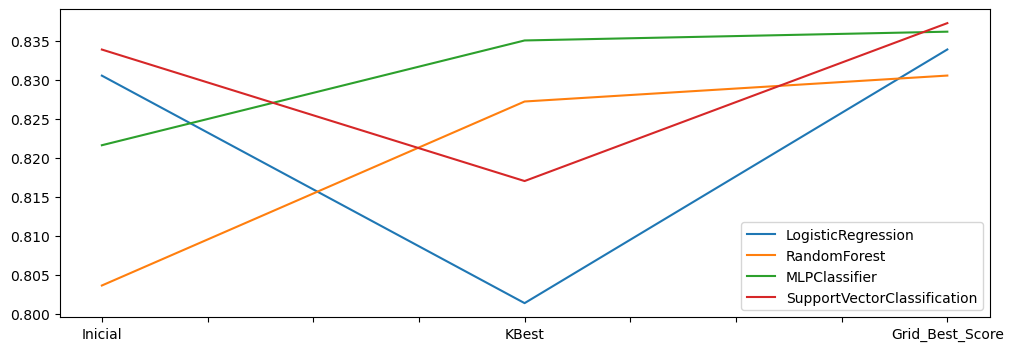

In [70]:
# Gráfico para comparar os modelos
plt.figure(figsize=(12, 4))

df_avaliacao.iloc[0, 1:].plot(label='LogisticRegression')
df_avaliacao.iloc[1, 1:].plot(label='RandomForest')
df_avaliacao.iloc[2, 1:].plot(label='MLPClassifier')
df_avaliacao.iloc[3, 1:].plot(label='SupportVectorClassification')

plt.legend()

- Vamos utilizar o modelo MLPClassifier (Redes Neurais) para predizer a base de teste.
- Foi feito a submissão da predição da base de teste utilizando o modelo SupportVectorClassification, porém o mesmo obteve uma acurácia menor que o modelo MLP. Por este motivo estaremos utilizando o modelo MLP.

In [71]:
# Para o MLPClassifier
clf_best_mlp = grid_search_mlp.best_estimator_
clf_best_mlp

MLPClassifier(alpha=1e-05, random_state=42)

### Fazendo a previsão para os dados de teste

In [72]:
# Separando a base de treino em X e y
X = treino_mlp.drop(['PassengerId', 'Survived'], axis=1)
y = treino_mlp['Survived']

In [73]:
# Visualizando o X_train
X.head(2)

,Pclass,Sex_male,Embarked_C,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Classe_Idade,Classe_Fare
0,3,1,0,1,0,0,1,0,2,3
1,1,0,1,0,0,0,0,1,2,1


In [74]:
# Visualizando a base de teste
teste_mlp.head(2)

,PassengerId,Pclass,Sex_male,Embarked_C,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Classe_Idade,Classe_Fare
0,892,3,1,0,0,0,0,1,0,2,3
1,893,3,0,0,1,0,0,0,1,2,3


In [75]:
# Para a base de teste ser igual a base de treino, precisamos eliminar algumas colunas
X_teste = teste_mlp.drop(['PassengerId'],axis=1)
X_teste.head(2)

,Pclass,Sex_male,Embarked_C,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Classe_Idade,Classe_Fare
0,3,1,0,0,0,0,1,0,2,3
1,3,0,0,1,0,0,0,1,2,3


- Para fazer previsão nos dados de teste, vamos treinar novamente o modelo, mas agora com todos os valores de treino

In [76]:
# Criando o classificador
clf_best_mlp = MLPClassifier(alpha=1e-05, random_state=42)

# Fazendo o fit com TODOS os dados de treino
clf_best_mlp = clf_best_mlp.fit(X, y)

- Fazendo a previsão nos dados de teste, os dados que ainda não foram "vistos" pelo nosso modelo

In [77]:
# Utilizando o MLPClassifier na base de teste
y_pred = clf_best_mlp.predict(X_teste)

In [78]:
# Criando uma nova coluna com a previsão na base de teste
teste_mlp['Survived'] = y_pred

In [79]:
# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste_mlp[['PassengerId','Survived']]
base_envio.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [80]:
# Exportando para um csv
base_envio.to_csv('submission/submission_parte3.csv',index=False)

- Agora que temos os resultados previstos pelo nosso modelo, podemos ir ao [Kaggle](https://www.kaggle.com/competitions/titanic/submissions) e fazer a submissão e verificar qual foi a acurácia do modelo.

**___________________________________________________________________________________________________________________________**
<a id='conclusao'></a>
# CONCLUSÃO

- Após a submissão do submission_parte1.csv no Kaggle, obtivemos um Score: 0.76076
- Após a submissão do submission_parte2.csv no Kaggle, obtivemos um Score: 0.77033
- Após a submissão do submission_parte3.csv no Kaggle, obtivemos um Score: 0.78468

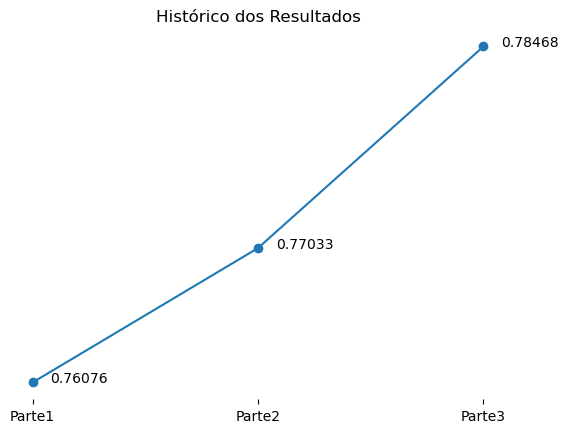

In [3]:
# Gráfico do histórico dos resultados
x = [1, 2, 3]
y = [0.76076, 0.77033, 0.78468]

plt.plot(x, y, '-o')

plt.xticks(x, ['Parte1', 'Parte2', 'Parte3'])
plt.yticks([])

# Deixar apenas o eixo x visível  
plt.gca().spines['left'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['bottom'].set_visible(False)

for i, y_valor in enumerate(y):
    plt.annotate(y_valor, [x[i]+0.08, y[i]])

plt.title('Histórico dos Resultados')

plt.show()

**___________________________________________________________________________________________________________________________**
<a id='resumo'></a>
# RESUMO

### Parte 1

**Tratamento**
- Coluna Embarked valores nulos atualizados com o valor "S"
- Coluna Fare valores nulos atualizados com o valor 7.0
- Coluna Age, os valores nulos foram substituidos pela mediana das idades de acordo com a classe (Pclass) e o sexo (Sex)
- Coluna Cabin foi removida devido a alta cardinalidade e muitos valores nulos
- Coluna Sex foi transformada para numérica com valores 1 para male e 0 para female
- Coluna Embarked foi transformada em numérica utilizando o método OneHotEncoder
- Coluna Name e Ticket foi removida por possuir alta cardinalidade

**Modelagem e Avaliação**
- Foram criados três modelos para fazer a previsão
    - Acurácia DecisionTree: 0.76
    - Acurácia KNN: 0.73
    - Acurácia LogisticRegression: 0.82

**Submissão Kaggle (LogisticRegression)**
- Score: 0.76076

### Parte 2

**Tratamento**
- Coluna Name: foi retirado o título pertencente a cada registro e então codificado com o OneHotEncoder.
- Coluna Age: foi criado uma classificação para as idades, sendo elas, criança, adulto e idoso e então codificado em numérico.
- Coluna SibSp e Parch: foi criado uma nova coluna Family que é a soma dos valores das colunas SibSp e Parch
- Coluna Fare: foi removida a coluna Fare, deixando apenas a coluna Pclass

**Modelagem e Avaliação**
- Foram criados três modelos para fazer a previsão
    - Acurácia DecisionTree: 0.78
    - Acurácia KNN: 0.78
    - Acurácia LogisticRegression: 0.84
    
**Submissão Kaggle (LogisticRegression)**
- Score: 0.77033

### Parte 3

**Tratamento**
- Utilizamos quatro modelos de Machine Learning: LogisticRegression, RandomForest, MLPClassifier e SVC
- Além disso, fizemos a validação cruzada e a seleção de features.
- Na seleção de features, foi identificado que as colunas 'PassengerId', 'Survived', 'Embarked_Q', 'Title_Others' e 'Family' tiveram baixa pontuação e poderiam ser removidas
- Por fim, foi realizado o GridSearchCV para identificar os melhores parâmetros para cada modelo e com isso, conseguimos melhorar a acurácia.

**Modelagem e Avaliação**
- Foram criados quatro modelos para fazer a previsão:
    - Acurácia LogisticRegression: 0.8339
    - Acurácia RandomForest: 0.8305
    - Acurácia MLPClassifier: 0.8361
    - Acurácia SVC: 0.8372
    
**Submissão Kaggle (MLPClassifier)**
- Score: 0.78468

### Código dos tratamentos
```
######################## PARTE 1 #######################################
# Tratando a Coluna Embarked - Base de Treino
treino.loc[treino['Embarked'].isnull(), 'Embarked'] = 'S'

# Tratando a Coluna Age - Base de Treino e Teste
treino['Age'].fillna(treino.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
teste['Age'].fillna(teste.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)

# Tratando a Coluna Fare - Base de Teste
teste.loc[teste['Fare'].isnull(), 'Fare'] = 7.0

# Tratando a Coluna Sex - Base de Treino e Teste
treino['Sex_male'] = pd.get_dummies(treino['Sex'], drop_first=True, dtype='int32')
teste['Sex_male'] = pd.get_dummies(teste['Sex'], drop_first=True, dtype='int32')

# Importando OneHotEnconder
from sklearn.preprocessing import OneHotEncoder

# Tratando a Coluna Embarked - Base de Treino e Teste
ohe = OneHotEncoder(handle_unknown='ignore',dtype='int32')

ohe_df_treino = pd.DataFrame(ohe.fit_transform(treino[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
treino = pd.concat([treino, ohe_df_treino], axis=1)

ohe_df_teste = pd.DataFrame(ohe.transform(teste[['Embarked']]).toarray(), columns=ohe.get_feature_names_out())
teste = pd.concat([teste, ohe_df_teste], axis=1)

# Removendo as colunas
treino.drop(['Cabin', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

# Removendo as colunas
teste.drop(['Cabin', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

######################## PARTE 2 #######################################

# importando a biblioteca string
import string

# Cria uma função que retorna apenas o título de cada registro
def title(texto):
    return ''.join([x for x in texto.split(',')[-1] if x not in string.punctuation]).split()[0]

# Aplicando a função para todas as linhas e retornando apenas o título
# O título então é armazenado em uma nova coluna chamada "Title"
treino['Title'] = treino['Name'].apply(lambda x: title(x))

# Deixando apenas os títulos Mr, Miss, Mrs e Master, os demais iremos nomeá-los como "others"
treino['Title'] = treino['Title'].apply(lambda x: x if x in ('Mr', 'Miss', 'Mrs', 'Master') else 'Others')

# transformando em numérico
treino = pd.get_dummies(treino, prefix='Title', dtype='int32', columns=['Title'])

# Aplicando a função para todas as linhas e retornando apenas o título
# O título então é armazenado em uma nova coluna chamada "Title"
teste['Title'] = teste['Name'].apply(lambda x: title(x))

# Deixando apenas os títulos Mr, Miss, Mrs e Master, os demais iremos nomeá-los como "others"
teste['Title'] = teste['Title'].apply(lambda x: x if x in ('Mr', 'Miss', 'Mrs', 'Master') else 'Others')

# Codificando a coluna Title para transformar os valores do tipo texto em valores numéricos
teste = pd.get_dummies(teste, prefix='Title', dtype='int32', columns=['Title'])

# Função para classificar as idades
def classifica_idade(idade):
    if idade < 18:
        return 1
    elif idade >= 18 and idade < 55:
        return 2
    else:
        return 3

# Criando uma coluna com a classificação das idades para a base de treino
treino['Classe_Idade'] = treino['Age'].apply(lambda x: classifica_idade(x))

# Criando uma coluna com a classificação das idades para a base de teste
teste['Classe_Idade'] = teste['Age'].apply(lambda x: classifica_idade(x))

# Unindo SipSp e Parch para a base de treino
treino['Family'] = treino['SibSp'] + treino['Parch']

# Unindo SipSp e Parch para a base de teste
teste['Family'] = teste['SibSp'] + teste['Parch']

# Removendo as colunas da base de treino
treino.drop(['Name', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)

# Removendo as colunas da base de teste
teste.drop(['Name', 'Age', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)

######################## PARTE 3 #######################################

# Importando o SelectKBest
from sklearn.feature_selection import SelectKBest

# Separando os dados de treino e teste
X = treino.drop(['PassengerId', 'Survived'],axis=1)
y = treino['Survived']

# Criando o nosso seletor
seletor = SelectKBest(k=10).fit(X,y)

# Seleciona as colunas que iremos remover com pontuações baixas
remov_cols = [x for x in treino.columns if x not in seletor.get_feature_names_out()]

# Definindo a base de treino e teste para o modelo MLPClassifier
treino_mlp = treino.drop(['Embarked_Q', 'Title_Others', 'Family'], axis=1)
teste_mlp = teste.drop(['Embarked_Q', 'Title_Others', 'Family'], axis=1)

# Definindo os parâmetros para o GridSearchCV
parametros_mlp = {
    'solver':  ['lbfgs','sgd','adam'],
    'alpha': [10.0**(-1),10.0**(-5),10.0**(-7),10.0**(-10)],
    'max_iter': [200,500,1000,5000]
}

# Importando o datetime para visualizar a hora atual
from datetime import datetime

def hora_atual():
    agora = datetime.now()
    print(str(agora.hour) + ':' + str(agora.minute) + ':' + str(agora.second))

# Definindo uma função para realizar o gridsearch
def grid(modelo, base, parametros):
    
    # Separando a base de treino em X e y
    X = base.drop(['PassengerId', 'Survived'], axis=1)
    y = base['Survived']

    print('Início: ') 
    hora_atual()

    kfold = KFold(n_splits=8, random_state=42, shuffle=True)
    
    grid_search = GridSearchCV(modelo(random_state=42), parametros, scoring='accuracy', cv=kfold)
    grid_search = grid_search.fit(X, y)

    print('Fim: ')
    hora_atual()
    
    return grid_search


# Chama a função para o MLPClassifier
grid_search_mlp = grid(MLPClassifier, treino_mlp, parametros_mlp)

# Separando a base de treino em X e y
X = treino_mlp.drop(['PassengerId', 'Survived'], axis=1)
y = treino_mlp['Survived']

# Para a base de teste ser igual a base de treino, precisamos eliminar algumas colunas
X_teste = teste_mlp.drop(['PassengerId'],axis=1)

# Criando o classificador com os melhores parâmetros
clf_best_mlp = MLPClassifier(alpha=1e-05, random_state=42)

# Fazendo o fit com TODOS os dados de treino
clf_best_mlp = clf_best_mlp.fit(X, y)

# Utilizando o MLPClassifier na base de teste
y_pred = clf_best_mlp.predict(X_teste)

# Criando uma nova coluna com a previsão na base de teste
teste_mlp['Survived'] = y_pred

# Selecionando apenas a coluna de Id e Survived para fazer o envio
base_envio = teste_mlp[['PassengerId','Survived']]
base_envio.head()

# Exportando para um csv
base_envio.to_csv('submission_parte3.csv',index=False)
```